In [1]:
import tensorflow.keras as keras
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
import os

In [2]:
def get_images(path):
    img = image.load_img(path)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [3]:
def get_all_file_name(path):
    dir = os.path.dirname(os.path.abspath('__file__'))
    filename = os.path.join(dir, path)
    dir_list=os.listdir(filename)
    return dir_list

In [4]:
Meta_l=get_all_file_name('SparkData/Metaplastic')
Koli_l=get_all_file_name('SparkData/Koilocytotic')
Dys_l=get_all_file_name('SparkData/Dyskeratotic')
Para_l=get_all_file_name('SparkData/Parabasal')
Super_l=get_all_file_name('SparkData/Superficial-Intermediate')

In [5]:
print(len(Meta_l))
print(len(Koli_l))
print(len(Dys_l))
print(len(Para_l))
print(len(Super_l))

793
825
813
787
831


In [6]:
Meta_img =np.concatenate( [get_images('SparkData/Metaplastic/'+name) for name in Meta_l])
Koli_img =np.concatenate( [get_images('SparkData/Koilocytotic/'+name) for name in Koli_l])
Dys_img =np.concatenate( [get_images('SparkData/Dyskeratotic/'+name) for name in Dys_l])
Para_img =np.concatenate( [get_images('SparkData/Parabasal/'+name) for name in Para_l])
Super_img =np.concatenate( [get_images('SparkData/Superficial-Intermediate/'+name) for name in Super_l])


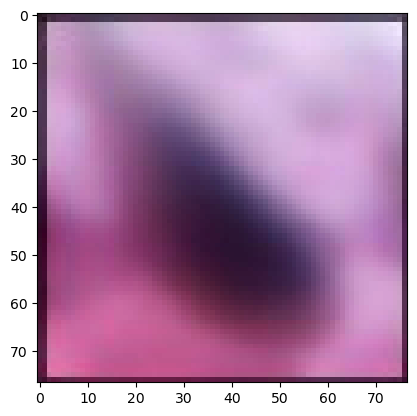

In [7]:
plt.imshow(image.array_to_img(Dys_img[1,:,:,:]))
plt.show()

In [8]:
#Create labels for all the classes:
Meta_labels=np.array([0]*len(Meta_img))
Koli_labels=np.array([1]*len(Koli_img))
Dys_labels=np.array([2]*len(Dys_img))
Para_labels=np.array([3]*len(Para_img))
Super_labels=np.array([4]*len(Super_img))


In [9]:
X = np.concatenate([Meta_img, Koli_img,Dys_img,Para_img,Super_img])
Y = np.concatenate([Meta_labels, Koli_labels,Dys_labels,Para_labels,Super_labels])

In [10]:
print(X.shape)
print(Y.shape)

(4049, 77, 77, 3)
(4049,)


In [11]:
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])

In [12]:
X.shape

(4049, 17787)

In [13]:
import pandas as pd
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(Y)

In [14]:
Y_df=Y_df.rename(columns = {0:'label'})

In [15]:
from sklearn.decomposition import PCA
# Set number of principal components for model
n_pcs = 1000
model = PCA(n_components=n_pcs)
# Fit the model - return projected data
demo_pca = model.fit_transform(X_df)
#Create a DataFrame of the projected data
demo_pca = pd.DataFrame(demo_pca)
demo_pca.head()


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,30.228472,-13.541273,-20.837011,16.278902,-2.230292,-1.854966,-4.060619,-5.557598,2.242417,-1.146481,...,0.036637,-0.016473,0.048068,0.032211,0.001107,-0.020329,0.028554,-0.031714,-0.049928,0.027934
1,-67.129478,-3.964090,-5.426903,0.446351,3.012194,5.941051,-3.140686,-1.721901,0.088476,-3.208895,...,0.052849,0.022832,0.021387,0.016474,0.014747,0.044901,-0.023107,-0.019175,-0.068906,-0.078212
2,29.587971,-28.280504,16.802586,1.750618,9.574121,5.484293,0.696984,-9.896680,-2.675802,-2.515794,...,-0.008525,0.049954,-0.043528,0.029274,0.041219,-0.027082,-0.013921,0.023323,-0.016402,0.050066
3,-28.195320,-15.950042,23.189003,-4.176376,-14.502806,1.586718,-10.616146,-8.174628,0.322621,-2.407385,...,0.013033,0.004801,-0.033466,0.054402,-0.060214,-0.045939,0.085556,-0.017849,0.016500,0.020103
4,-0.938427,-8.349248,-0.301873,2.629717,6.413976,5.783343,-3.203318,-5.218890,1.841870,4.037651,...,-0.001306,-0.005725,-0.044353,0.010533,0.087847,0.016418,-0.087884,-0.020955,-0.009417,0.089997


In [16]:
explained_ratio = model.explained_variance_ratio_
explained_ratio = pd.DataFrame(explained_ratio).reset_index()
explained_ratio = explained_ratio.rename(columns = {0: 'explained_ratio', 'index': 'PC'})
explained_ratio['explained_ratio_sum']= np.cumsum(explained_ratio.explained_ratio)
explained_ratio

,PC,explained_ratio,explained_ratio_sum
0,0,5.594232e-01,0.559423
1,1,1.328089e-01,0.692232
2,2,4.171268e-02,0.733945
3,3,3.804913e-02,0.771994
4,4,3.212373e-02,0.804118
...,...,...,...
995,995,9.494518e-07,0.999483
996,996,9.395253e-07,0.999484
997,997,9.382255e-07,0.999485
998,998,9.353575e-07,0.999486


In [17]:
df_pca = pd.concat([demo_pca, Y_df], axis=1)

In [18]:
df_pca.shape

(4049, 1001)

In [19]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,label
0,30.228472,-13.541273,-20.837011,16.278902,-2.230292,-1.854966,-4.060619,-5.557598,2.242417,-1.146481,...,-0.016473,0.048068,0.032211,0.001107,-0.020329,0.028554,-0.031714,-0.049928,0.027934,0
1,-67.129478,-3.964090,-5.426903,0.446351,3.012194,5.941051,-3.140686,-1.721901,0.088476,-3.208895,...,0.022832,0.021387,0.016474,0.014747,0.044901,-0.023107,-0.019175,-0.068906,-0.078212,0
2,29.587971,-28.280504,16.802586,1.750618,9.574121,5.484293,0.696984,-9.896680,-2.675802,-2.515794,...,0.049954,-0.043528,0.029274,0.041219,-0.027082,-0.013921,0.023323,-0.016402,0.050066,0
3,-28.195320,-15.950042,23.189003,-4.176376,-14.502806,1.586718,-10.616146,-8.174628,0.322621,-2.407385,...,0.004801,-0.033466,0.054402,-0.060214,-0.045939,0.085556,-0.017849,0.016500,0.020103,0
4,-0.938427,-8.349248,-0.301873,2.629717,6.413976,5.783343,-3.203318,-5.218890,1.841870,4.037651,...,-0.005725,-0.044353,0.010533,0.087847,0.016418,-0.087884,-0.020955,-0.009417,0.089997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,-39.742901,42.064606,6.670410,-3.560548,3.242203,-12.398719,-5.343525,-2.507759,3.082253,0.743170,...,0.018941,0.069566,-0.022426,-0.017497,0.050190,-0.005640,-0.032772,-0.094601,-0.062866,4
4045,-30.811855,1.942973,1.644684,6.039786,13.512910,-18.845682,-11.595403,-1.592035,6.716273,-14.099759,...,0.146454,-0.061487,-0.095781,0.056743,0.095285,0.097067,-0.008667,0.091709,-0.022749,4
4046,-68.670258,8.355042,0.366667,0.416110,-1.779785,30.188795,-1.265771,5.228253,-3.785135,-4.385539,...,0.061259,0.127756,-0.040392,0.005476,0.025420,-0.076123,0.056132,0.100948,0.056874,4
4047,-23.868826,0.125862,7.463031,5.793087,5.133804,-0.467406,1.970361,-4.296658,5.258260,5.549036,...,0.038705,-0.084904,-0.090109,0.111806,-0.057692,-0.087377,-0.008493,-0.148455,0.051026,4


In [20]:
from pathlib import Path  
filepath = Path('pca.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_pca.to_csv(filepath, index=False) 